# Explore here

In [ ]:
import os
import pandas as pd
import seaborn as sns
import spotipy
from dotenv import load_dotenv
from spotipy.oauth2 import SpotifyClientCredentials

CLIENT_ID="0e724116d5604b5a98695b83a31c0e2b"
CLIENT_SECRET="568c83764e0d425d9da292ecac700de8"

# load the .env file variables
load_dotenv()

con = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = CLIENT_ID, client_secret = CLIENT_SECRET))

artist_id = "3TVXtAsR1Inumwj472S9r4"

response = con.artist_top_tracks("790FomKkXshlbRYZFtlgla")
if response:
  # We keep the "tracks" object of the answer
  tracks = response["tracks"]
  # We select, for each song, the data we are interested in and discard the rest
  tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]

print(tracks)




[{'duration_ms': 3.263733333333333, 'name': 'Si Antes Te Hubiera Conocido', 'popularity': 93}, {'duration_ms': 2.87995, 'name': 'QLONA', 'popularity': 83}, {'duration_ms': 2.8413333333333335, 'name': 'AMARGURA', 'popularity': 84}, {'duration_ms': 2.5729, 'name': 'MI EX TENÍA RAZÓN', 'popularity': 82}, {'duration_ms': 3.4604333333333335, 'name': 'PROVENZA', 'popularity': 80}, {'duration_ms': 3.2988833333333334, 'name': 'TQG', 'popularity': 81}, {'duration_ms': 3.7682166666666665, 'name': 'MAMIII', 'popularity': 78}, {'duration_ms': 4.968833333333333, 'name': '+57', 'popularity': 80}, {'duration_ms': 2.7397666666666667, 'name': 'MIENTRAS ME CURO DEL CORA', 'popularity': 79}, {'duration_ms': 3.3353333333333333, 'name': 'X SI VOLVEMOS', 'popularity': 77}]
   duration_ms                       name  popularity
9     3.335333              X SI VOLVEMOS          77
6     3.768217                     MAMIII          78
8     2.739767  MIENTRAS ME CURO DEL CORA          79
4     3.460433        

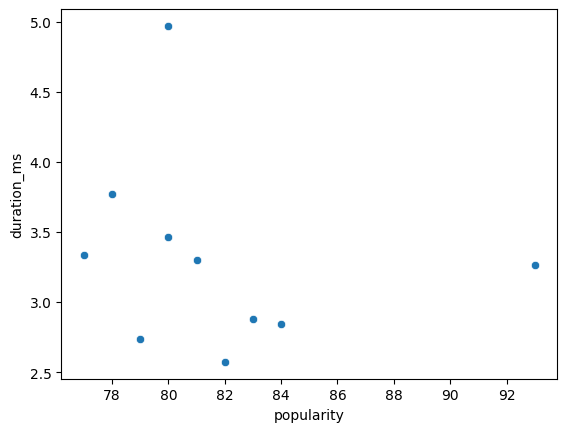

In [14]:
scatter_plot = sns.scatterplot(data = tracks_df, x = "popularity", y = "duration_ms")
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")